In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Define Gradients and Hessians

In [242]:
def gradEs(xk, yk, xkp1, ykp1, l_k, k):
    """
    Calculate the gradient of the stretching energy with respect to the coordinates.

    Args:
    - xk (float): x coordinate of the current point
    - yk (float): y coordinate of the current point
    - xkp1 (float): x coordinate of the next point
    - ykp1 (float): y coordinate of the next point
    - l_k (float): reference length
    - EA (float): elastic modulus

    Returns:
    - F (np.array): Gradient array
    """
    F = np.zeros(4)
    F[0] = -(1.0 - np.sqrt((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0) / l_k) * ((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0)**(-0.5) / l_k * (-2.0 * xkp1 + 2.0 * xk)
    F[1] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (-0.2e1 * ykp1 + 0.2e1 * yk)
    F[2] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (0.2e1 * xkp1 - 0.2e1 * xk)
    F[3] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (0.2e1 * ykp1 - 0.2e1 * yk)

    F = 0.5 * k * l_k * F  # Scale by k and l_k

    return F

In [243]:
def hessEs(xk, yk, xkp1, ykp1, l_k, k):
    """
    This function returns the 4x4 Hessian of the stretching energy E_k^s with
    respect to x_k, y_k, x_{k+1}, and y_{k+1}.
    """
    J = np.zeros((4, 4))  # Initialize the Hessian matrix
    J11 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * xkp1 + 2 * xk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((-2 * xkp1 + 2 * xk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J12 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * ykp1 + 2 * yk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (-2 * ykp1 + 2 * yk) / 0.2e1
    J13 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (2 * xkp1 - 2 * xk) / 0.2e1 + 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J14 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (2 * ykp1 - 2 * yk) / 0.2e1
    J22 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * ykp1 + 2 * yk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((-2 * ykp1 + 2 * yk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J23 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) * (-2 * ykp1 + 2 * yk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * ykp1 + 2 * yk) * (2 * xkp1 - 2 * xk) / 0.2e1
    J24 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (-2 * ykp1 + 2 * yk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * ykp1 + 2 * yk) * (2 * ykp1 - 2 * yk) / 0.2e1 + 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J33 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((2 * xkp1 - 2 * xk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J34 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (2 * xkp1 - 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (2 * xkp1 - 2 * xk) * (2 * ykp1 - 2 * yk) / 0.2e1
    J44 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((2 * ykp1 - 2 * yk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k

    J = np.array([[J11, J12, J13, J14],
                   [J12, J22, J23, J24],
                   [J13, J23, J33, J34],
                   [J14, J24, J34, J44]])

    J *= 0.5 * k * l_k

    return J

# Write Nodes and Properties to Files

In [244]:
# %%writefile nodes.txt
# 0, 0
# 1, 0
# 2, 0
# 1, -1

In [245]:
# %%writefile springs.txt
# 0, 1, 10
# 1, 2, 20
# 0, 3, 5
# 2, 3, 5

In [246]:
%%writefile nodes.txt
0, 0
1, 1
2, 0
1, -1

Overwriting nodes.txt


In [247]:
%%writefile springs.txt
0, 1, 10000
1, 2, 10000
0, 3, 10000
2, 3, 10000
0, 2, 13

Overwriting springs.txt


# Read the nodes, springs, and properties

In [248]:
nodes_file_path = 'nodes.txt'
node_coordinates = []

try:
    with open(nodes_file_path, 'r') as f:
        for line in f:
            # Split each line by comma and remove leading/trailing whitespace
            parts = [part.strip() for part in line.split(',')]
            # Assuming the format is node number, x, y
            # We only need x and y, which are the second and third elements (index 1 and 2)
            if len(parts) == 2:
                try:
                    x = float(parts[0])
                    y = float(parts[1])
                    node_coordinates.append([x, y])
                except ValueError:
                    print(f"Skipping line due to non-numeric coordinates: {line.strip()}")
            else:
                print(f"Skipping line due to incorrect format: {line.strip()}")

    # Convert the list of coordinates to a NumPy array
    node_matrix = np.array(node_coordinates)

    print("Node coordinates successfully loaded into a numpy matrix.")
    display(node_matrix)

except FileNotFoundError:
    print(f"Error: The file '{nodes_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Node coordinates successfully loaded into a numpy matrix.


array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  0.],
       [ 1., -1.]])

In [249]:
springs_file_path = 'springs.txt'
index_info = []
stiffness_info = []

try:
    with open(springs_file_path, 'r') as f:
        for line in f:
            # Split each line by comma and remove leading/trailing whitespace
            parts = [part.strip() for part in line.split(',')]
            # Assuming the format is spring number, first node, second node, stiffness
            if len(parts) == 3:
                try:
                    first_node_index = float(parts[0])
                    second_node_index = float(parts[1])
                    stiffness = float(parts[2])
                    index_info.append([2*first_node_index, 2*first_node_index+1, 2*second_node_index, 2*second_node_index+1])
                    stiffness_info.append(stiffness)
                except ValueError:
                    print(f"Skipping line due to non-numeric coordinates: {line.strip()}")
            else:
                print(f"Skipping line due to incorrect format: {line.strip()}")

    # Convert the list of coordinates to a NumPy array
    index_matrix = np.array(index_info)
    stiffness_matrix = np.array(stiffness_info)

    print("Spring indices successfully loaded into a numpy matrix.")
    display(index_matrix)

    print("Spring stiffnesses successfully loaded into a numpy matrix.")
    display(stiffness_matrix)

except FileNotFoundError:
    print(f"Error: The file '{springs_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Spring indices successfully loaded into a numpy matrix.


array([[0., 1., 2., 3.],
       [2., 3., 4., 5.],
       [0., 1., 6., 7.],
       [4., 5., 6., 7.],
       [0., 1., 4., 5.]])

Spring stiffnesses successfully loaded into a numpy matrix.


array([10000., 10000., 10000., 10000.,    13.])

# Equations of motion and Jacobian

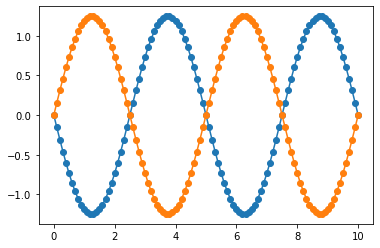

In [250]:
def getFexternal(t=None, m=None):
    """
    Return external contractile force vector.
    Allows calling either getFexternal(t, m) or getFexternal(m).
    """
    # Support call with single argument getFexternal(m)
    if m is None:
        m = t
        t = 0.0

    F = 1.25 * np.sin(2.0 * np.pi * (t/5))  # Contractile force varying with time
    F_contract = np.zeros_like(m)

    # Apply forces to the y-DOFs of node 0 and node 3 if indices exist
    try:
        F_contract[2 * 1 + 1] = -F
        F_contract[2 * 3 + 1] = F
    except Exception:
        # If vector is too small, silently skip assignment
        pass

    return F_contract

dt = 0.1 # Time step size
maxTime = 10   # total time of simulation
t = np.arange(0, maxTime + dt, dt)

F_history = np.zeros((len(t), 8))
for i, time in enumerate(t):
	F_history[i]  = getFexternal(time, np.zeros(8))
     
plt.plot(t , F_history[:, 3], 'o-')
plt.plot(t , F_history[:, 7], 'o-')

In [251]:
def getForceJacobian(x_new, x_old, u_old, stiffness_matrix, index_matrix, m, dt, l_k, F_contract):

  ndof = x_new.shape[0]

  # Inertia
  f_inertia = m/dt * ((x_new - x_old)/dt - u_old)
  J_inertia = np.diag(m) / dt ** 2

  # Spring
  f_spring = np.zeros_like(x_new)
  J_spring = np.zeros((ndof,ndof))
  for i in range(stiffness_matrix.shape[0]):
    ind = index_matrix[i].astype(int)
    xi = x_new[ind[0]]
    yi = x_new[ind[1]]
    xj = x_new[ind[2]]
    yj = x_new[ind[3]]
    stiffness = stiffness_matrix[i]
    f_spring[ind] += gradEs(xi, yi, xj, yj, l_k[i], stiffness)
    J_spring[np.ix_(ind, ind)] += hessEs(xi, yi, xj, yj, l_k[i], stiffness)
  
  f_w = np.zeros_like(m)
  for i in range(len(m) // 2 ):
    f_w[2 * i] = 0.0
    f_w[2 * i + 1] = m[2 * i + 1] * (-9.8)
  J_w = np.zeros((ndof,ndof))
    
  f = f_inertia + f_spring - f_w - F_contract
  J = J_inertia + J_spring - J_w

  return f, J

# Preparation at t = 0

In [252]:
N = node_matrix.shape[0] # Number of nodes
ndof = 2 * N # Number of degrees of freedom

# Initialize positions, velocities, and accelerations
x_old = np.zeros(ndof)
u_old = np.zeros(ndof)
a_old = np.zeros(ndof)

# Build the position (DOF) vector. Velocity and acceleration remains zero
for i in range(N):
  x_old[2*i] = node_matrix[i][0]
  x_old[2*i+1] = node_matrix[i][1]

# Every spring has a rest length
l_k = np.zeros_like(stiffness_matrix)
for i in range(stiffness_matrix.shape[0]):
  ind = index_matrix[i].astype(int)  # Convert indices to integers
  xi = x_old[ind[0]]
  yi = x_old[ind[1]]
  xj = x_old[ind[2]]
  yj = x_old[ind[3]]
  l_k[i] = np.sqrt((xj - xi)**2 + (yj - yi)**2)

**Mass and Weight**

In [253]:
# Mass
m = np.zeros(ndof)
for i in range(ndof):
  m[i] = 1.0

# Weight
W = getFexternal(m)

# Simulation Loop

**Simulate/integrate function**

In [254]:
# Integrator
def myInt(t_new, x_old, u_old, free_DOF, stiffness_matrix, index_matrix, m, dt, F_contract):

  # Guess solution for x_new
  x_new = x_old.copy() # Start with a copy of x_old as the initial guess

  eps = 1.0e-6 # tolerance
  err = eps * 100  # initialize to a large value

  # Newton-Raphson method
  while err > eps:
    f, J = getForceJacobian(x_new, x_old, u_old, stiffness_matrix, index_matrix, m, dt, l_k, F_contract)

    # Extract free DOFs
    J_free = J[np.ix_(free_DOF, free_DOF)]
    f_free = f[free_DOF]

    # Solve for deltaX of free DOFs
    deltaX_free = np.linalg.solve(J_free, f_free)
    # finds position that minimizes the force close to eps

    # Construct full deltaX vector
    deltaX = np.zeros_like(x_new)
    deltaX[free_DOF] = deltaX_free

    # Update x_new
    x_new = x_new - deltaX

    # Calculate error based on the force in free DOFs
    err = np.linalg.norm(f_free)

  u_new = (x_new - x_old) / dt

  return x_new, u_new

In [255]:
def myIntE(t_new, x_old, u_old, free_DOF, stiffness_matrix, index_matrix, m, dt):

  # Guess solution for x_new
  x_new = x_old.copy() # Start with a copy of x_old as the initial guess

  # Explicit Eulers
  for k in range(len(t)-1):

    f, _ = getForceJacobian(x_new, x_old, u_old, stiffness_matrix, index_matrix, m, dt, l_k)

    # Acceleration
    a = - f / m

    # Velocity and position update
    u_new = u_old + dt * a
    x_new = x_old + dt * u_old

    # Store results and update
    y_1[k+1] = x_new[3]
    y_3[k+1] = x_new[7]
    x_old, u_old = x_new, u_new

  return x_new, u_new

In [256]:
def myIntNewmark(t_new, x_old, u_old, a_old, free_DOF, stiffness_matrix, index_matrix, m, dt, beta=1/4, gamma=1/2):

    # Initial guess for acceleration (could also use a_old)
    a_new = a_old.copy()

    eps = 1.0e-6
    err = eps * 100

    # Precompute constants
    dt2_beta = dt**2 * beta
    dt_gamma = dt * gamma

    while err > eps:
        # Predict x and u using current guess of a_new
        x_pred = x_old + dt * u_old + dt**2 * ((0.5 - beta) * a_old + beta * a_new)
        u_pred = u_old + dt * ((1 - gamma) * a_old + gamma * a_new)

        # Compute residual force and Jacobian
        f, J = getForceJacobian(x_pred, x_old, u_old, stiffness_matrix, index_matrix, m, dt, l_k)

        # Extract free DOFs
        f_free = f[free_DOF]
        J_free = J[np.ix_(free_DOF, free_DOF)]

        # Effective mass matrix for Newmark-beta
        M_eff = np.diag(m[free_DOF]) + dt2_beta * J_free

        # Solve for delta acceleration
        delta_a_free = np.linalg.solve(M_eff, f_free)

        # Update acceleration
        a_new[free_DOF] -= delta_a_free

        # Update error
        err = np.linalg.norm(f_free)

    # Final positions and velocities
    x_new = x_old + dt * u_old + dt**2 * ((0.5 - beta) * a_old + beta * a_new)
    u_new = u_old + dt * ((1 - gamma) * a_old + gamma * a_new)

    return x_new, u_new, a_new

**Plotting Function**

In [257]:
def plot(x, index_matrix, t):
  plt.figure() # Create a new figure for each plot
  plt.title('Spring Network ' + f'(Time: {t:.2f} second)') # Add a title with the current time
  for i in range(index_matrix.shape[0]):
    ind = index_matrix[i].astype(int)  # Convert indices to integers
    xi = x[ind[0]]
    yi = x[ind[1]]
    xj = x[ind[2]]
    yj = x[ind[3]]
    plt.plot([xi, xj], [yi, yj], 'bo-') # Plot a blue line with circles at the nodes
  plt.xlabel('x (m)')
  plt.ylabel('y (m)') 
  plt.xlim([-1, 3])
  plt.ylim([-2, 2])
  plt.axis('equal')
  plt.grid(True)
  plt.show()

**Main Simulation Loop**

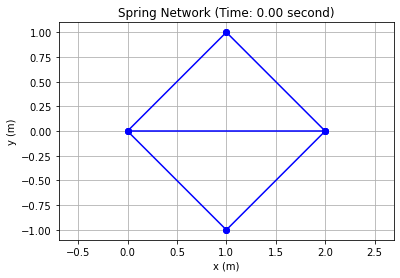

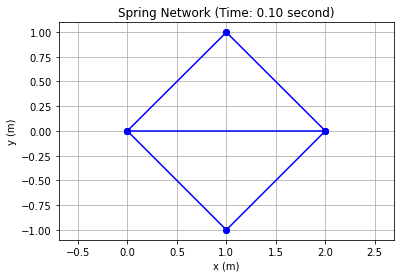

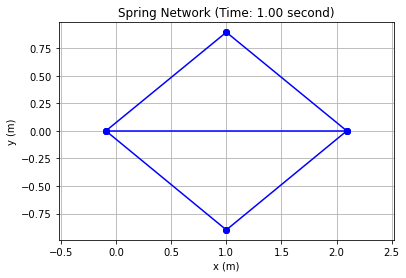

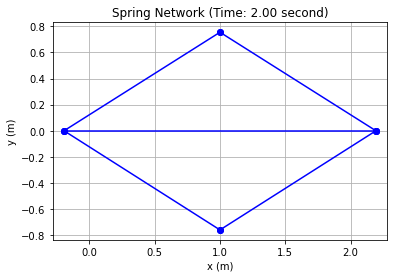

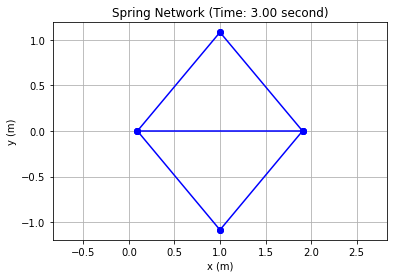

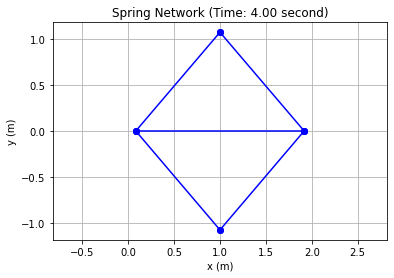

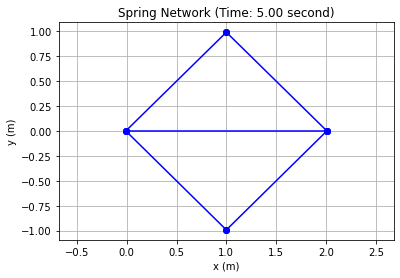

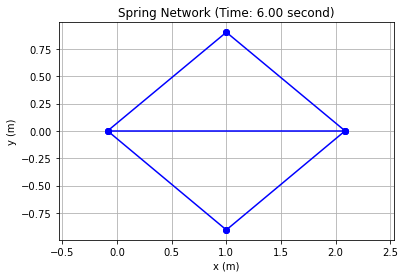

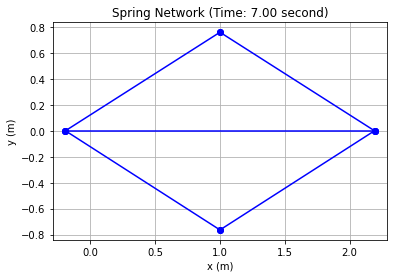

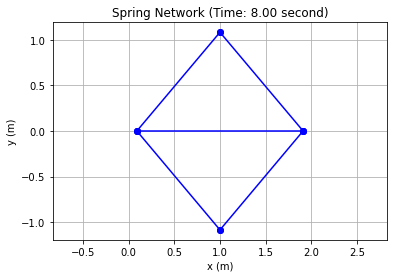

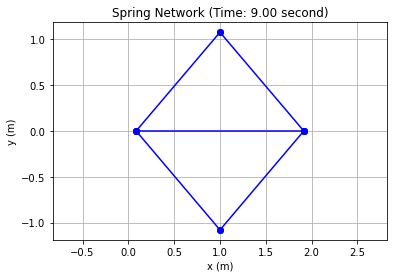

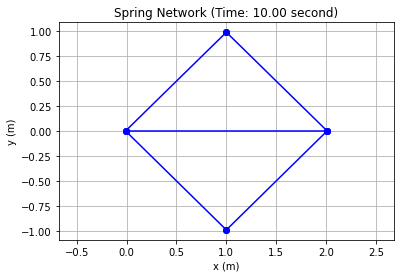

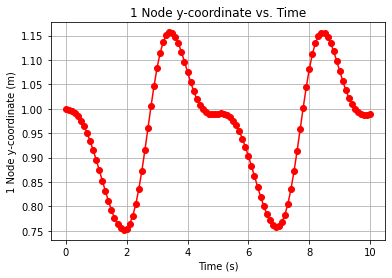

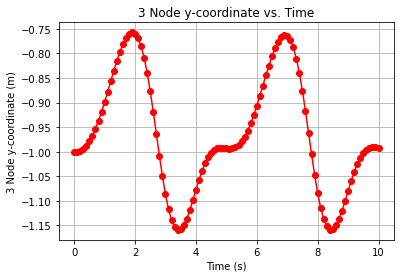

In [ ]:
dt = 0.1 # Time step size
maxTime = 10   # total time of simulation
t = np.arange(0, maxTime + dt, dt)

# free indices
#0,1, 2,3, 4,5, 6,7,
fixed_DOF = np.array([ 1, 5])  # Fix x and y of node 0 and node 4
free_DOF = np.array([i for i in range(ndof) if i not in fixed_DOF])

# Container to store y-coordinate of 1st node
y_1 = np.zeros(len(t))
y_1[0] = x_old[3] # y-coordinate of 1st node

y_3 = np.zeros(len(t))
y_3[0] = x_old[7] # y-coordinate of 1st node

plot_indices = np.array([0, 0.1, 1, 2,3,4,5,6,7,8,9, 10])

frames = []   # to store x configurations
times = []    # corresponding times

for k in range(len(t)-1):
  t_val = t[k]
  t_new = t[k+1]

  if t_val in plot_indices:
    plot(x_old, index_matrix, t_val)
    
  F_contract = getFexternal(t_new, m)
  # print(F_contract)
  x_new, u_new = myInt(t_new, x_old, u_old, free_DOF, stiffness_matrix, index_matrix, m, dt, F_contract)
  #x_new, u_new, a_old = myIntNewmark(t_new, x_old, u_old, a_old, free_DOF, stiffness_matrix, index_matrix, m, dt, beta=1/4, gamma=1/2)
  #x_new, u_new = myIntE(t_new, x_old, u_old, free_DOF, stiffness_matrix, index_matrix, m, dt)

  if k == len(t) - 2:
    plot(x_new, index_matrix, t_new)

  y_1[k+1] = x_new[3]
  y_3[k+1] = x_new[7]

  frames.append(x_new.copy())
  times.append(t_new)
  
  x_old = x_new
  u_old = u_new

# Plot y of node 1
plt.figure()
plt.plot(t, y_1, 'ro-')
plt.xlabel('Time (s)')
plt.ylabel('1 Node y-coordinate (m)')
plt.title('1 Node y-coordinate vs. Time')
plt.grid(True)
plt.show()

# Plot y of node 3
plt.figure()
plt.plot(t, y_3, 'ro-')
plt.xlabel('Time (s)')
plt.ylabel('3 Node y-coordinate (m)')
plt.title('3 Node y-coordinate vs. Time')
plt.grid(True)
plt.show()

def plot_on_axes(ax, x, index_matrix, t):
    ax.clear()
    ax.set_title(f"Spring Network (Time: {t:.2f} s)")
    
    for i in range(index_matrix.shape[0]):
        ind = index_matrix[i].astype(int)
        xi = x[ind[0]]
        yi = x[ind[1]]
        xj = x[ind[2]]
        yj = x[ind[3]]
        ax.plot([xi, xj], [yi, yj], 'bo-')

    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_xlim([-1, 3])
    ax.set_ylim([-2, 2])
    ax.set_aspect('equal', 'box')
    ax.grid(True)

    
fig, ax = plt.subplots(figsize=(6,4))

def animate(i):
    plot_on_axes(ax, frames[i], index_matrix, times[i])

anim = FuncAnimation(fig, animate, frames=len(frames), interval=100)  
writer = FFMpegWriter(fps=30)
anim.save("worm_simulation.mp4", writer=writer)